# Data clean approach by removing all null values

In [2]:
# import datetime
# s=datetime.datetime.now()


In [3]:
# import pandas as pd
# import random
# import datetime
# df = pd.read_csv('dirty_data.csv')
# df['Data'] = [datetime.date.today() - datetime.timedelta(days=random.randint(1,165)) for i in range(200000)]


In [4]:
# df = df.rename(columns={'Data':'Date'})

In [5]:
# df.to_csv('dirty_data.csv',index=False)

# Data Cleaning and Preprocessing

In [1]:
import pandas as pd
df = pd.read_csv('dirty_data.csv',parse_dates=['Date'])   # fetching date in wrte format
df.head(2)


,Customer ID,Name,Age,Date of Birth,Email,Income Status,Mobile No,Country,Mobile Active,Email Active,City,Action,Time Spent,Date,Product Code,Transaction_Amount
0,RC312930,Edmund,59.0,1964-07-17,colon2010@yandex.com,>=50k,6.502866e+09,AuQtralia,1.0,0.0,Mount Isa,['Shared product' 'Add to cart'],15:20:05,2024-05-03,"['AHVV7698', 'DFGJ8151', 'BQES4973', 'HSDO4158...",337.474031
1,KF724017,Elenora,66.0,2003-09-14,honors2021@outlook.com,>=50k,5.560106e+11,Brazil,0.0,1.0,Capanema,['Purchase' 'Save for later'],14:49:55,2024-04-13,"['NQMV1049', 'ZDAQ9768', 'HGPN6607', 'MPOZ2166...",3100.192547


### converting Product code values into list 

In [2]:
import ast

def string_to_list(x):
    try:
        # Try to parse the string as a literal (list, tuple, etc.)
        parsed = ast.literal_eval(x)
        if isinstance(parsed, (list, tuple)):
            return parsed
        else:
            return [parsed]  # Single item wrapped in a list
    except:
        # If parsing fails, return the original string wrapped in a list
        return [x]

df['Product Code'] = df['Product Code'].apply(string_to_list)

# table of actual analysis

grouping by customer_id and sum(transaction_Amount), sum(number of visits by customer), sum(time spent), sum(number of products)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Customer ID         196200 non-null  object        
 1   Name                191400 non-null  object        
 2   Age                 194600 non-null  float64       
 3   Date of Birth       193000 non-null  object        
 4   Email               195800 non-null  object        
 5   Income Status       188200 non-null  object        
 6   Mobile No           194000 non-null  float64       
 7   Country             193200 non-null  object        
 8   Mobile Active       197200 non-null  float64       
 9   Email Active        195400 non-null  float64       
 10  City                191200 non-null  object        
 11  Action              191000 non-null  object        
 12  Time Spent          190400 non-null  object        
 13  Date                191600 no

In [46]:
# def list_length(x):
#     return len(x) if isinstance(x, list) else 0

# # Now apply it to the column
# df['Product Code Length'] = df['Product Code'].apply(list_length)
# df['Product Code Length']

### converting time col into minutes, for easy calculations

In [3]:
import pandas as pd
import random

def list_length(x):
    return x.apply(lambda y: len(y) if isinstance(y, list) else 0).sum()

def time_min(x):
    def convert(y):
        if isinstance(y, str):
            parts = y.split(':')
            if len(parts) == 3:
                return float(parts[0])*60 + float(parts[1]) + float(parts[2])/60
        return 0
    return x.apply(convert).sum()

def random_(series):
    return random.choice(series.tolist())

pd.options.display.float_format = '{:.2f}'.format

df1 = df.groupby('Customer ID').agg({
    'Transaction_Amount': 'sum',
    'Time Spent': time_min,
    'Product Code': list_length,  # Replace 'List_Column' with your actual column name
    'Customer ID': 'count',
    'Email Active': random_,
    'Mobile Active':random_,
    'Income Status':random_
},)

df1 = df1.rename(columns={'Customer ID': 'Customer Visit','Product Code':'Total Products'})
df1 = df1.reset_index()
df1

,Customer ID,Transaction_Amount,Time Spent,Total Products,Customer Visit,Email Active,Mobile Active,Income Status
0,AA181858,45309.76,14703.17,102,22,1.00,1.00,>=50k
1,AA290158,16638.73,13503.43,77,18,1.00,0.00,<50k
2,AA369946,9397.90,15742.72,126,20,0.00,1.00,<50k
3,AA454031,45488.77,11219.83,64,16,1.00,1.00,>=50k
4,AA608452,60108.88,14747.75,86,19,1.00,1.00,unemployed
...,...,...,...,...,...,...,...,...
9994,ZZ893525,17233.87,17145.07,95,22,0.00,1.00,<50k
9995,ZZ902625,86132.51,14061.47,126,21,NaN,1.00,unemployed
9996,ZZ920377,42564.44,12690.55,106,21,0.00,1.00,>=50k
9997,ZZ949119,11054.13,14295.93,100,23,1.00,0.00,NaN


In [72]:
df1.columns

Index(['Customer ID', 'Transaction_Amount', 'Time Spent', 'Total Products',
       'Customer Visit', 'Email Active', 'Mobile Active', 'Income Status'],
      dtype='object')

# How big is the Data

In [73]:
df1.shape

(9999, 8)

# Is there any null value

In [74]:
df1.isnull().sum()

Customer ID             0
Transaction_Amount      0
Time Spent              0
Total Products          0
Customer Visit          0
Email Active          232
Mobile Active         131
Income Status         610
dtype: int64

# Data type of all columns

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         9999 non-null   object 
 1   Transaction_Amount  9999 non-null   float64
 2   Time Spent          9999 non-null   float64
 3   Total Products      9999 non-null   int64  
 4   Customer Visit      9999 non-null   int64  
 5   Email Active        9767 non-null   float64
 6   Mobile Active       9868 non-null   float64
 7   Income Status       9389 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB


# Mathematical inference

In [76]:
df1.describe()

,Transaction_Amount,Time Spent,Total Products,Customer Visit,Email Active,Mobile Active
count,9999.00,9999.00,9999.00,9999.00,9767.00,9868.00
mean,40182.93,13469.54,105.86,19.62,0.50,0.51
std,22088.74,2663.77,21.19,2.73,0.50,0.50
min,4341.74,3598.68,40.00,10.00,0.00,0.00
25%,19118.82,11651.82,91.00,18.00,0.00,0.00
50%,43089.74,13437.07,105.00,20.00,1.00,1.00
75%,56937.66,15222.52,120.00,21.00,1.00,1.00
max,112159.00,24671.98,187.00,31.00,1.00,1.00


# Are there duplicate values


In [78]:
df1.duplicated().sum()

0

In [79]:
# droping duplicates

df1 = df1.drop_duplicates()


# Corelation between columns

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         9999 non-null   object 
 1   Transaction_Amount  9999 non-null   float64
 2   Time Spent          9999 non-null   float64
 3   Total Products      9999 non-null   int64  
 4   Customer Visit      9999 non-null   int64  
 5   Email Active        9781 non-null   float64
 6   Mobile Active       9862 non-null   float64
 7   Income Status       9434 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB


In [9]:
corelation_matrix = df1.select_dtypes(include=['int64','float64']).corr()
corelation_matrix

# no corelation shown as it has to be near 1 or 0.1 at least

,Transaction_Amount,Time Spent,Total Products,Customer Visit,Email Active,Mobile Active
Transaction_Amount,1.00,0.17,0.18,0.25,0.01,-0.00
Time Spent,0.17,1.00,0.47,0.70,-0.00,0.01
Total Products,0.18,0.47,1.00,0.69,-0.00,0.01
Customer Visit,0.25,0.70,0.69,1.00,0.00,0.01
Email Active,0.01,-0.00,-0.00,0.00,1.00,0.01
Mobile Active,-0.00,0.01,0.01,0.01,0.01,1.00


In [81]:
# for partiular column only

corelation_matrix['Transaction_Amount']

Age                  -0.00
Mobile No            -0.01
Mobile Active        -0.00
Email Active          0.00
Transaction_Amount    1.00
Name: Transaction_Amount, dtype: float64

In [14]:
# useful_df = df[['Customer ID','Email Active','Mobile Active','City','Time Spent', 'Transaction_Amount', 'Product Code']]

# Below code to be used later

# Removing missing values

removing the customer whose transaction is zero throughout

ALso removing data with no cutomer ID

In [15]:
# df2 = df.groupby('Customer ID')
# df3 = df2['Transaction_Amount'].sum().reset_index()
# df3

In [17]:

# to_remove_cutomer_lst = df3[df3["Transaction_Amount"]==0]['Customer ID'].tolist()
# df = df[(~df['Customer ID'].isin(to_remove_cutomer_lst)) & (df['Customer ID'].notnull())] # & (df['Transaction_Amount'].notnull())] -- removed it bcz a user can have another row with some amount transaction

In [18]:
# df.info()

# Removing Outliers

In [19]:
# df['Transaction_Amount'].quantile(1)

In [20]:
# df.count()

In [21]:
# df['Transaction_Amount'].max()

In [22]:
# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     print(Q1,Q3)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     print(lower_bound,upper_bound)
#     return df[~((df[column] < lower_bound) | (df[column] > upper_bound))]

# df2 = remove_outliers(df,'Transaction_Amount')
# df2


In [48]:
df2['Transaction_Amount'].max()

38933.07324039676

# Scaling 
not needed for now

# EDA

Visualising Outliers

In [24]:
# import seaborn as sns
# sns.boxplot(df['Transaction_Amount'],width=0.8)


In [23]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# # Create sample data
# np.random.seed(0)
# data = pd.DataFrame({
#     'group': np.repeat(['A', 'B', 'C', 'D'], 50),
#     'value': np.random.randn(200)
# })

# # Set up the plot
# plt.figure(figsize=(10, 6))

# # Create boxplot
# # sns.boxplot(y=df['Transaction_Amount'], data=data, palette='Set3')

# # Add scatter points
# sns.stripplot(y=df['Transaction_Amount'], data=data, color='black', alpha=0.5, jitter=True)

# # Customize the plot
# plt.title('Boxplot with Scatter Points')
# plt.xlabel('Group')
# plt.ylabel('Value')

# # Show the plot
# plt.show()

# Univariate analysis

In [83]:
df1

,Customer ID,Transaction_Amount,Time Spent,Total Products,Customer Visit,Email Active,Mobile Active,Income Status
0,AA181858,45309.76,14703.17,102,22,1.00,1.00,>=50k
1,AA290158,16638.73,13503.43,77,18,1.00,0.00,<50k
2,AA369946,9397.90,15742.72,126,20,0.00,1.00,<50k
3,AA454031,45488.77,11219.83,64,16,1.00,1.00,>=50k
4,AA608452,60108.88,14747.75,86,19,1.00,1.00,unemployed
...,...,...,...,...,...,...,...,...
9994,ZZ893525,17233.87,17145.07,95,22,0.00,1.00,<50k
9995,ZZ902625,86132.51,14061.47,126,21,1.00,1.00,unemployed
9996,ZZ920377,42564.44,12690.55,106,21,0.00,1.00,>=50k
9997,ZZ949119,11054.13,14295.93,100,23,1.00,0.00,<50k


# 1. Categorical Data

### a. Countplot

In [84]:
df1['Email Active'].value_counts()

Email Active
1.00    98637
0.00    96763
Name: count, dtype: int64

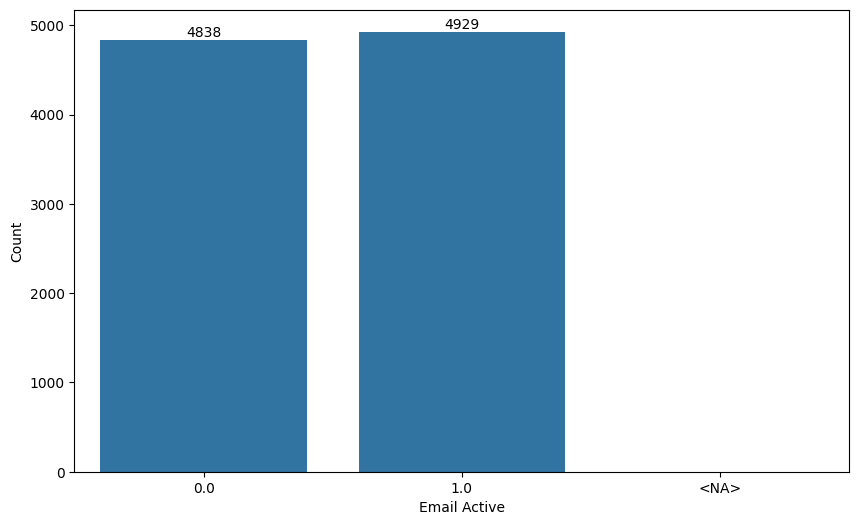

In [88]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Email Active', data=df1, order=[0.0, 1.0, pd.NA])

# Customize the plot
# plt.title('Count of Email Active Status')
plt.xlabel('Email Active')
plt.ylabel('Count')

# Add value labels on top of each bar
for i in plt.gca().containers:
    plt.gca().bar_label(i)

plt.show()

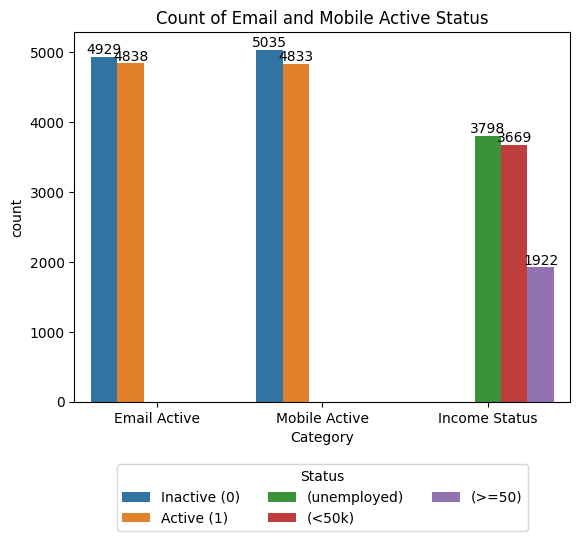

In [89]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Melt the dataframe to long format
df_melted = df1[['Email Active', 'Mobile Active','Income Status']].melt(var_name='Category', value_name='Value')


sns.countplot(x='Category', hue='Value', data=df_melted, order=['Email Active', 'Mobile Active','Income Status'])

# Customize the plot
plt.title('Count of Email and Mobile Active Status')


# Add value labels on top of each bar
for container in plt.gca().containers:
    plt.gca().bar_label(container)

plt.legend(title='Status', labels=['Inactive (0)', 'Active (1)', '(unemployed)','(<50k)','(>=50)'],loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.show()

In [90]:
df_melted

,Category,Value
0,Email Active,1.00
1,Email Active,1.00
2,Email Active,0.00
3,Email Active,1.00
4,Email Active,1.00
...,...,...
29992,Income Status,<50k
29993,Income Status,unemployed
29994,Income Status,>=50k
29995,Income Status,<50k


### b. Pie Chart

<Axes: ylabel='count'>

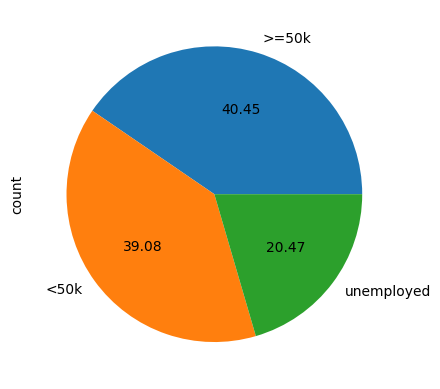

In [91]:
df1['Income Status'].value_counts().plot(kind='pie',autopct='%.2f')

# 2. Numerical Data

### a. Histogram

In [92]:
df1.columns

Index(['Customer ID', 'Transaction_Amount', 'Time Spent', 'Total Products',
       'Customer Visit', 'Email Active', 'Mobile Active', 'Income Status'],
      dtype='object')

(array([92112., 22712., 22586., 22997., 22476.,   718.,   763.,   573.,
          601.,   749.,   609.,   554.,   720.,   594.,   568.,   768.,
          358.,   249.,   167.,   126.]),
 array([2.81975109e-02, 9.98710895e+02, 1.99739359e+03, 2.99607629e+03,
        3.99475899e+03, 4.99344168e+03, 5.99212438e+03, 6.99080708e+03,
        7.98948978e+03, 8.98817247e+03, 9.98685517e+03, 1.09855379e+04,
        1.19842206e+04, 1.29829033e+04, 1.39815860e+04, 1.49802687e+04,
        1.59789514e+04, 1.69776341e+04, 1.79763167e+04, 1.89749994e+04,
        1.99736821e+04]),
 <BarContainer object of 20 artists>)

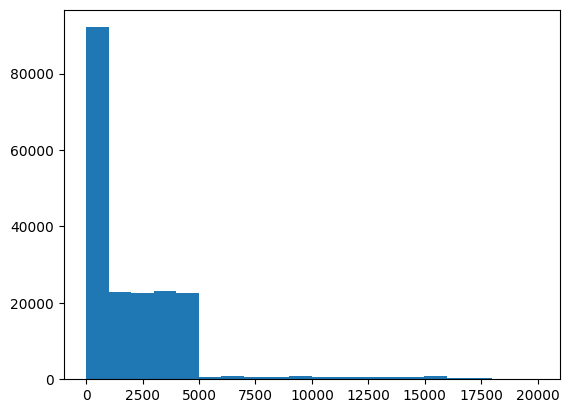

In [93]:
import matplotlib.pyplot as plt
plt.hist(df['Transaction_Amount'],bins=20)

### b.Distplot

C:\Users\Admin\AppData\Local\Temp\ipykernel_12828\2604167807.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Transaction_Amount'])


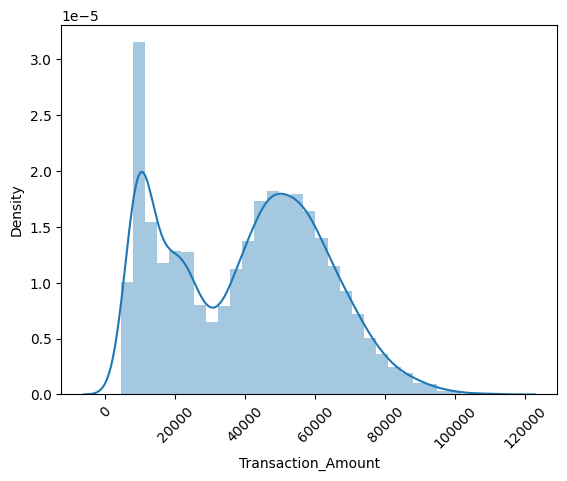

In [95]:
import seaborn as sns

sns.distplot(df1['Transaction_Amount'])
plt.xticks(rotation=45)
plt.show()

In [98]:
df1['Transaction_Amount'].skew()

0.08800593748668932

### c. Boxplot

In [6]:
df1

,Customer ID,Transaction_Amount,Time Spent,Total Products,Customer Visit,Email Active,Mobile Active,Income Status
0,AA181858,45309.76,14703.17,102,22,1.00,1.00,>=50k
1,AA290158,16638.73,13503.43,77,18,1.00,0.00,<50k
2,AA369946,9397.90,15742.72,126,20,0.00,1.00,<50k
3,AA454031,45488.77,11219.83,64,16,1.00,1.00,>=50k
4,AA608452,60108.88,14747.75,86,19,1.00,1.00,unemployed
...,...,...,...,...,...,...,...,...
9994,ZZ893525,17233.87,17145.07,95,22,0.00,1.00,<50k
9995,ZZ902625,86132.51,14061.47,126,21,1.00,1.00,unemployed
9996,ZZ920377,42564.44,12690.55,106,21,0.00,1.00,>=50k
9997,ZZ949119,11054.13,14295.93,100,23,1.00,0.00,<50k


In [111]:
df1.columns

Index(['Customer ID', 'Transaction_Amount', 'Time Spent', 'Total Products',
       'Customer Visit', 'Email Active', 'Mobile Active', 'Income Status'],
      dtype='object')

<Axes: ylabel='Transaction_Amount'>

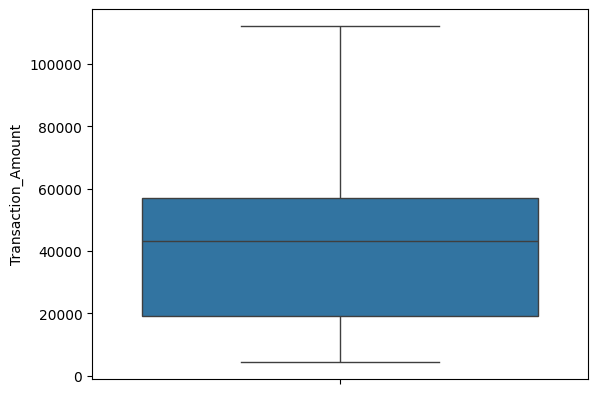

In [5]:

sns.boxplot(df1['Transaction_Amount'].dropna(),flierprops = dict(markersize=0.01))


# Multivariate Analysis

## 1.Scatterplot  ( Numerical - Numerical )

<Axes: xlabel='Time Spent', ylabel='Transaction_Amount'>

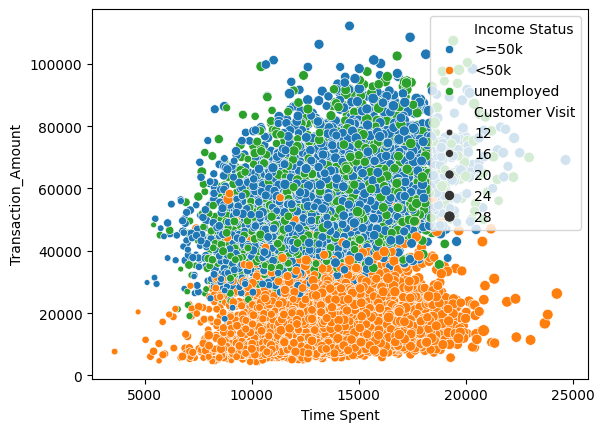

In [14]:
sns.scatterplot(y=df1['Transaction_Amount'],x=df1['Time Spent'],hue=df1['Income Status'],size=df1['Customer Visit'])

## 2. Bar Plot (Numerical - Categorical)

<Axes: xlabel='Income Status', ylabel='Transaction_Amount'>

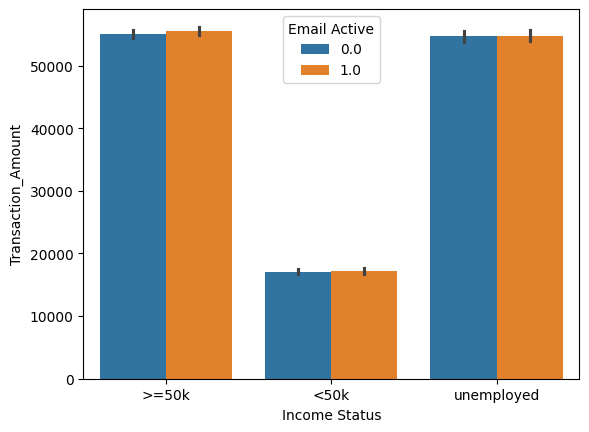

In [110]:
sns.barplot(x=df1['Income Status'],y=df1['Transaction_Amount'],hue=df1['Email Active'])

## 3. Box Plot (Numerical - Categorical)

<Axes: xlabel='Income Status', ylabel='Transaction_Amount'>

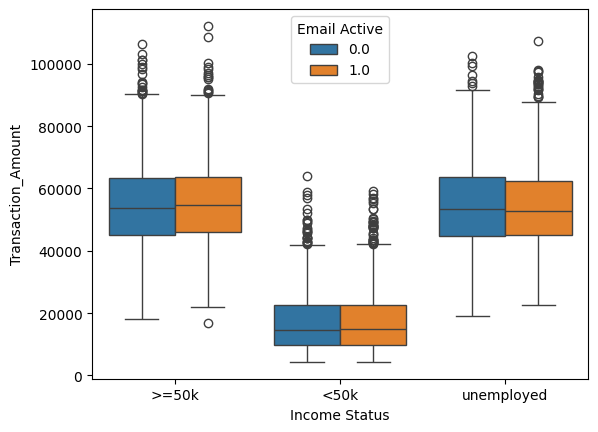

In [15]:
sns.boxplot(x=df1['Income Status'],y=df1['Transaction_Amount'],hue=df1['Email Active'])

## 4. Distplot (Numerical - Categorical)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20312\2348013692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[df1['Income Status']=='>=50k']['Transaction_Amount'],hist=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20312\2348013692.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<Axes: xlabel='Transaction_Amount', ylabel='Density'>

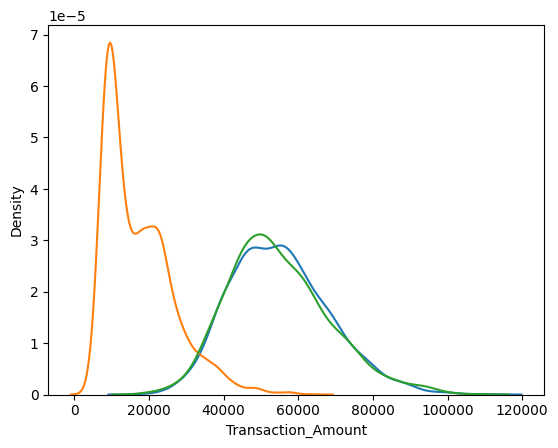

In [16]:
sns.distplot(df1[df1['Income Status']=='>=50k']['Transaction_Amount'],hist=False)
sns.distplot(df1[df1['Income Status']=='<50k']['Transaction_Amount'],hist=False)
sns.distplot(df1[df1['Income Status']=='unemployed']['Transaction_Amount'],hist=False)

## 5.HeatMap (Categorical - Categorical)

<Axes: xlabel='Email Active', ylabel='Income Status'>

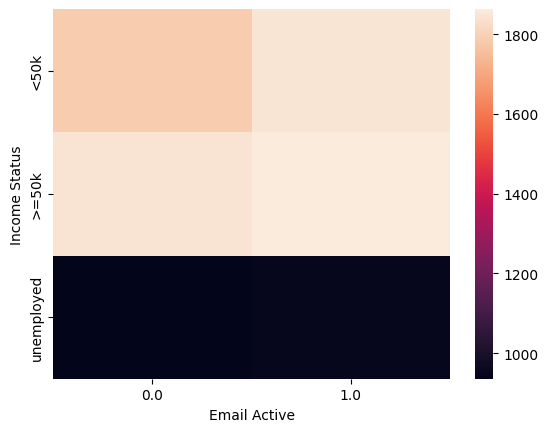

In [17]:
sns.heatmap(pd.crosstab(df1['Income Status'],df1['Email Active']))

## 6. ClusterMap (Categorical - Categorical)

In [18]:
sns.clustermap(pd.crosstab(df1['Income Status'],df1['Email Active']))

RuntimeError: clustermap requires scipy to be available

# Data Profiling

In [19]:
import pandas as pd

In [55]:
# !pip install ydata-profiling --user

In [54]:
# !pip show ydata-profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '>=50k'')
  warnings.warn(


ModuleNotFoundError: No module named 'matplotlib.backends.backend_svg'

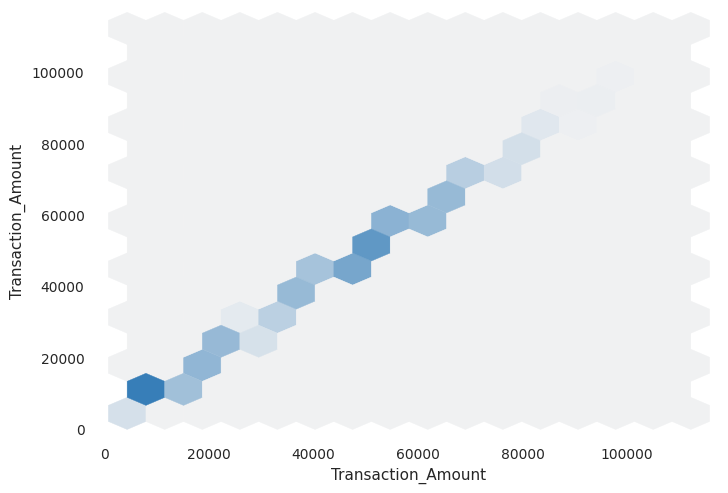

In [53]:
import pandas as pd
from ydata_profiling import ProfileReport

df2=df1.select_dtypes(['int64','float64'])
profile = ProfileReport(df1, title="Profiling Report")

# profile.to_notebook_iframe() # Display the report in a Jupyter Notebook
# OR
profile.to_file("books_data.html")

# CLTV CALCULATION


In [ ]:
for i in 

In [5]:
useful_df['CLTV'] = 